In [2]:
"""
(*)~---------------------------------------------------------------------------
author: p.wagner@unsw.edu.au / p.wagner@bhvi.org

data: gaze positions with headmovements compensated and target positions averaged 
    - draw 95% confidence interval 
dependencies:
    - GDDA_library - library for repetitive code 
    - experiment_execution_logV.2.xlsx'
        - contains recording locations for each px and test
    - t_pos_gaze_coordinates_meta.csv for each recording  
        - contains meta data of all recordings 
        - mean target positon and mean gaze pos sc, cc, ...  
        - derived from  "ttd, ttd_meta = GDDA.get_ttd_and_meta(recording_fp, target_distances)"
            - for mean of gaze positions rough exclusin of >3 std was applyed
---------------------------------------------------------------------------~(*)
"""

import pandas as pd 
import numpy as np
import os, os.path, json, glob, sys 
import GDDA_library as GDDA
from matplotlib.patches import Ellipse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# %matplotlib inline

# target distances top left to bottom right; index 0 not allocated
target_distances = pd.DataFrame({'distance': [0, 1.00, 1.50, .70, .70, .30, .50, 1.50, .50, .50, .30, 1.00, 3.6, 2.1]})
acc_rec_fps_all = pd.DataFrame(columns=['acc_id', 'acc_rec_fp'])

participant_logbook = pd.read_excel(r'C:\Users\p.wagner\Documents\experiment_execution_logV.2.xlsx', index_col=0 )
recordings_location = r'D:\PupilLabsRecordings'
colours = ['b', 'g', 'c', 'm', 'brown','orange','fuchsia', 'teal',  'olive',  'b', 'g', 'c', 'm']
aimed_t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
participant_IDs = [2, 3, 4, 5, 6, 7, 9, 10, 11, 12] 




In [3]:
# average out all found targets centres
accs_rec_ids = ['acc_rec_initial', 'acc_rec_5min', 'acc_rec_1hour']
x_mean_all = 0
y_mean_all = 0  
for participant_ID in participant_IDs:
    acc_rec_fps = GDDA.get_acc_rec_fps(participant_logbook, participant_ID, recordings_location, accs_rec_ids)
    acc_rec_fps_all = acc_rec_fps_all.append(acc_rec_fps, ignore_index=True)
    
for idx, recording_fp in enumerate(acc_rec_fps_all.loc[:, 'acc_rec_fp']):
    ttd_meta_data = pd.read_csv(os.path.join(recording_fp, 't_pos_gaze_coordinates_meta.csv'))
    x_mean_all = x_mean_all + ttd_meta_data.loc[:, 'x']
    y_mean_all = y_mean_all + ttd_meta_data.loc[:, 'y']
x_mean_all = x_mean_all / acc_rec_fps_all.shape[0]
y_mean_all = y_mean_all / acc_rec_fps_all.shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
acc_rec_fps_all.head()

,acc_id,acc_rec_fp,px_id
0,acc_rec_initial,D:\PupilLabsRecordings\2020_03_31\001,2
1,acc_rec_5min,D:\PupilLabsRecordings\2020_03_31\003,2
2,acc_rec_1hour,D:\PupilLabsRecordings\2020_03_31\005,2
3,acc_rec_initial,D:\PupilLabsRecordings\2020_04_01\002,3
4,acc_rec_5min,D:\PupilLabsRecordings\2020_04_01\005,3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


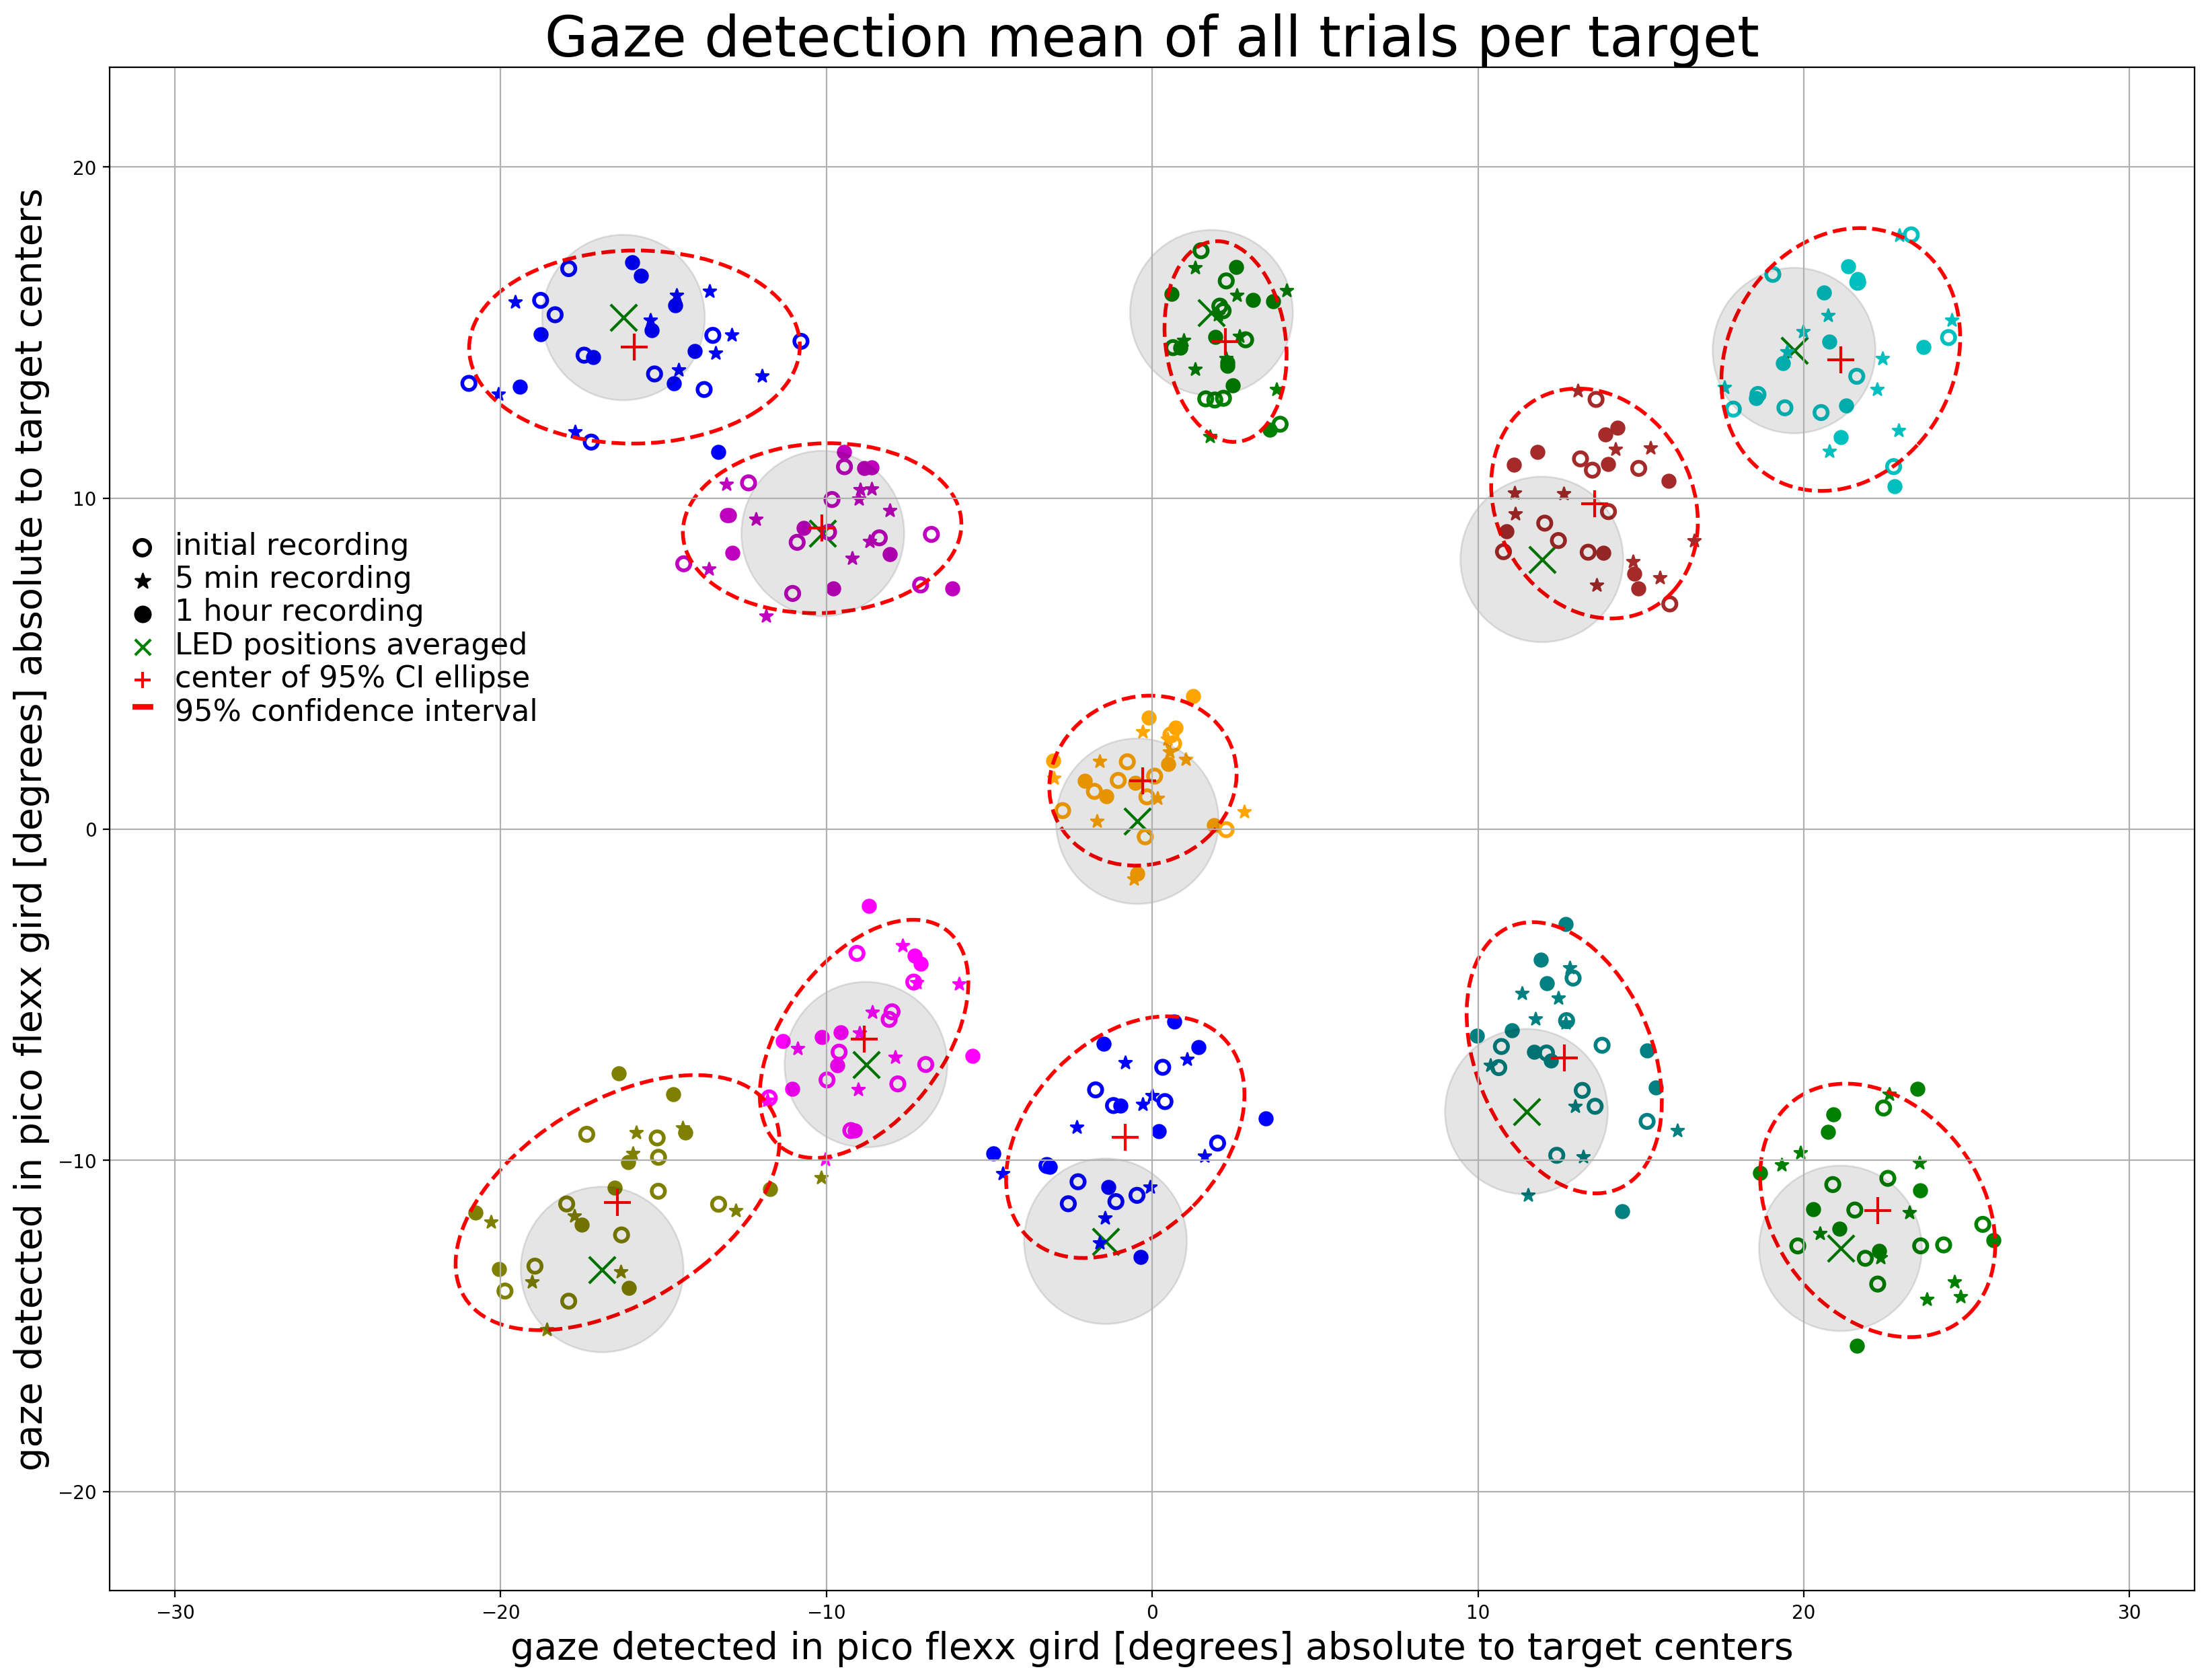

In [9]:
acc_rec_fps_all = pd.DataFrame(columns=['acc_id', 'acc_rec_fp'])
accs_rec_ids = ['acc_rec_initial', 'acc_rec_5min', 'acc_rec_1hour']

# load all meta.csv and display x_mean and y_mean and all gaze_mean_cc_x/y 
fig = plt.figure(figsize=(20, 15), dpi=200, facecolor='w', edgecolor='k')
plt.title('Gaze detection mean of all trials per target' ,    fontsize=30)
plt.xlabel('gaze detected in pico flexx gird [degrees] absolute to target centers', fontsize=20)
plt.ylabel('gaze detected in pico flexx gird [degrees] absolute to target centers', fontsize=20)
plt.xlim([-32, 32])
plt.ylim([-23, 23])
plt.grid() 


plt.scatter((x_mean_all-112)*.26, (85+ -1*y_mean_all)*.26, c='g', marker='x', s=200)
    # # # detected targets and averaged area 
for c_idx in x_mean_all.index:
    circle=plt.Circle(((x_mean_all[c_idx]-112)*.26,
                      (-1 * y_mean_all[c_idx]+85)*.26),
                      2.5,
                      fill=True, alpha=.1, color='black')
    plt.gcf().gca().add_artist(circle)

for participant_ID in participant_IDs:
    acc_rec_fps = GDDA.get_acc_rec_fps(participant_logbook, participant_ID, recordings_location, accs_rec_ids)
    acc_rec_fps_all = acc_rec_fps_all.append(acc_rec_fps, ignore_index=True)


for idx, recording_fp in enumerate(acc_rec_fps_all.loc[:, 'acc_rec_fp']):
    ttd_meta_data = pd.read_csv(os.path.join(recording_fp, 't_pos_gaze_coordinates_meta.csv'), index_col = 0)
    for t_nr in aimed_t:
        # put in marker differenciation 
        if acc_rec_fps_all.loc[idx, 'acc_id'] == 'acc_rec_initial':
            marker_style = dict(marker='o', s=50, c ='none', edgecolor=colours[t_nr-1],linewidth=2)

        elif acc_rec_fps_all.loc[idx, 'acc_id'] == 'acc_rec_5min': 
            marker_style = dict(marker='*', s=50, c = colours[t_nr-1], )

        elif acc_rec_fps_all.loc[idx, 'acc_id'] == 'acc_rec_1hour': 
            marker_style = dict(marker='o', s=50, c = colours[t_nr-1], )


        plt.scatter((x_mean_all[t_nr-1] + ttd_meta_data.loc[t_nr, 'delta_mean_cc_x']-112)*.26, 
                        (85 + -1* (y_mean_all[t_nr-1] + ttd_meta_data.loc[t_nr, 'delta_mean_cc_y']))*.26,
                        **marker_style) 
ax =plt.subplot()
# for each target extract 'delta_mean_cc_x' 'delta_mean_cc_y' and display ci 
for t_aimed in range(1,12):
    CI95_data = pd.DataFrame(columns= ['x_mean_cc', 'y_mean_cc'])
    for idx, recording_fp in enumerate(acc_rec_fps_all.loc[:, 'acc_rec_fp']):
        ttd_meta_data = pd.read_csv(os.path.join(recording_fp, 't_pos_gaze_coordinates_meta.csv'), index_col = 0)
        CI95_data.loc[idx, 'x_mean_cc'] = ttd_meta_data.loc[t_aimed, 'delta_mean_cc_x'] + x_mean_all[t_aimed-1]
        CI95_data.loc[idx, 'y_mean_cc'] = ttd_meta_data.loc[t_aimed, 'delta_mean_cc_y'] + y_mean_all[t_aimed-1]
    x = (CI95_data.loc[:, 'x_mean_cc'].to_numpy(dtype=float)-112) *.26
    y = (-1*CI95_data.loc[:, 'y_mean_cc'].to_numpy(dtype=float)+85) *.26    
    ellipse = GDDA.confidence_ellipse(x, y, ax, n_std=1.96,
                label=r'$1.96\sigma$', edgecolor='red', linestyle='--', linewidth=2)
    plt.scatter(x.mean(), y.mean(), c='red', marker='+', s=200, linewidths=20)




plt.text(-30, 8.3, 'initial recording', fontsize=16)
plt.scatter(-31, 8.5, marker='o', s=70, c ='none', edgecolor='k', linewidth=2) 
plt.text(-30, 7.3, '5 min recording', fontsize=16)
plt.scatter(-31, 7.5, marker='*', s=70, c ='k') 
plt.text(-30, 6.3, '1 hour recording', fontsize=16)
plt.scatter(-31, 6.5, marker='o', s=70, c ='k') 
plt.text(-30, 5.3, 'LED positions averaged', fontsize=16)
plt.scatter(-31, 5.5, marker='x', s=70, c ='green') 
plt.text(-30, 4.3, 'center of 95% CI ellipse', fontsize=16)
plt.scatter(-31, 4.5, marker='+', s=70, c ='red') 
plt.text(-30, 3.3, '95% confidence interval', fontsize=16)
plt.plot([-31.3, -30.5], [3.7, 3.7], c ='red', linestyle='--',linewidth=3)

output_fn = os.path.join(r'C:\Users\p.wagner\Documents\phd\output', 
                         'all_px_mean_' + "".join(x for x in str(accs_rec_ids) if x.isalnum()) + '.jpeg')

plt.savefig(output_fn, orientation='landscape')

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


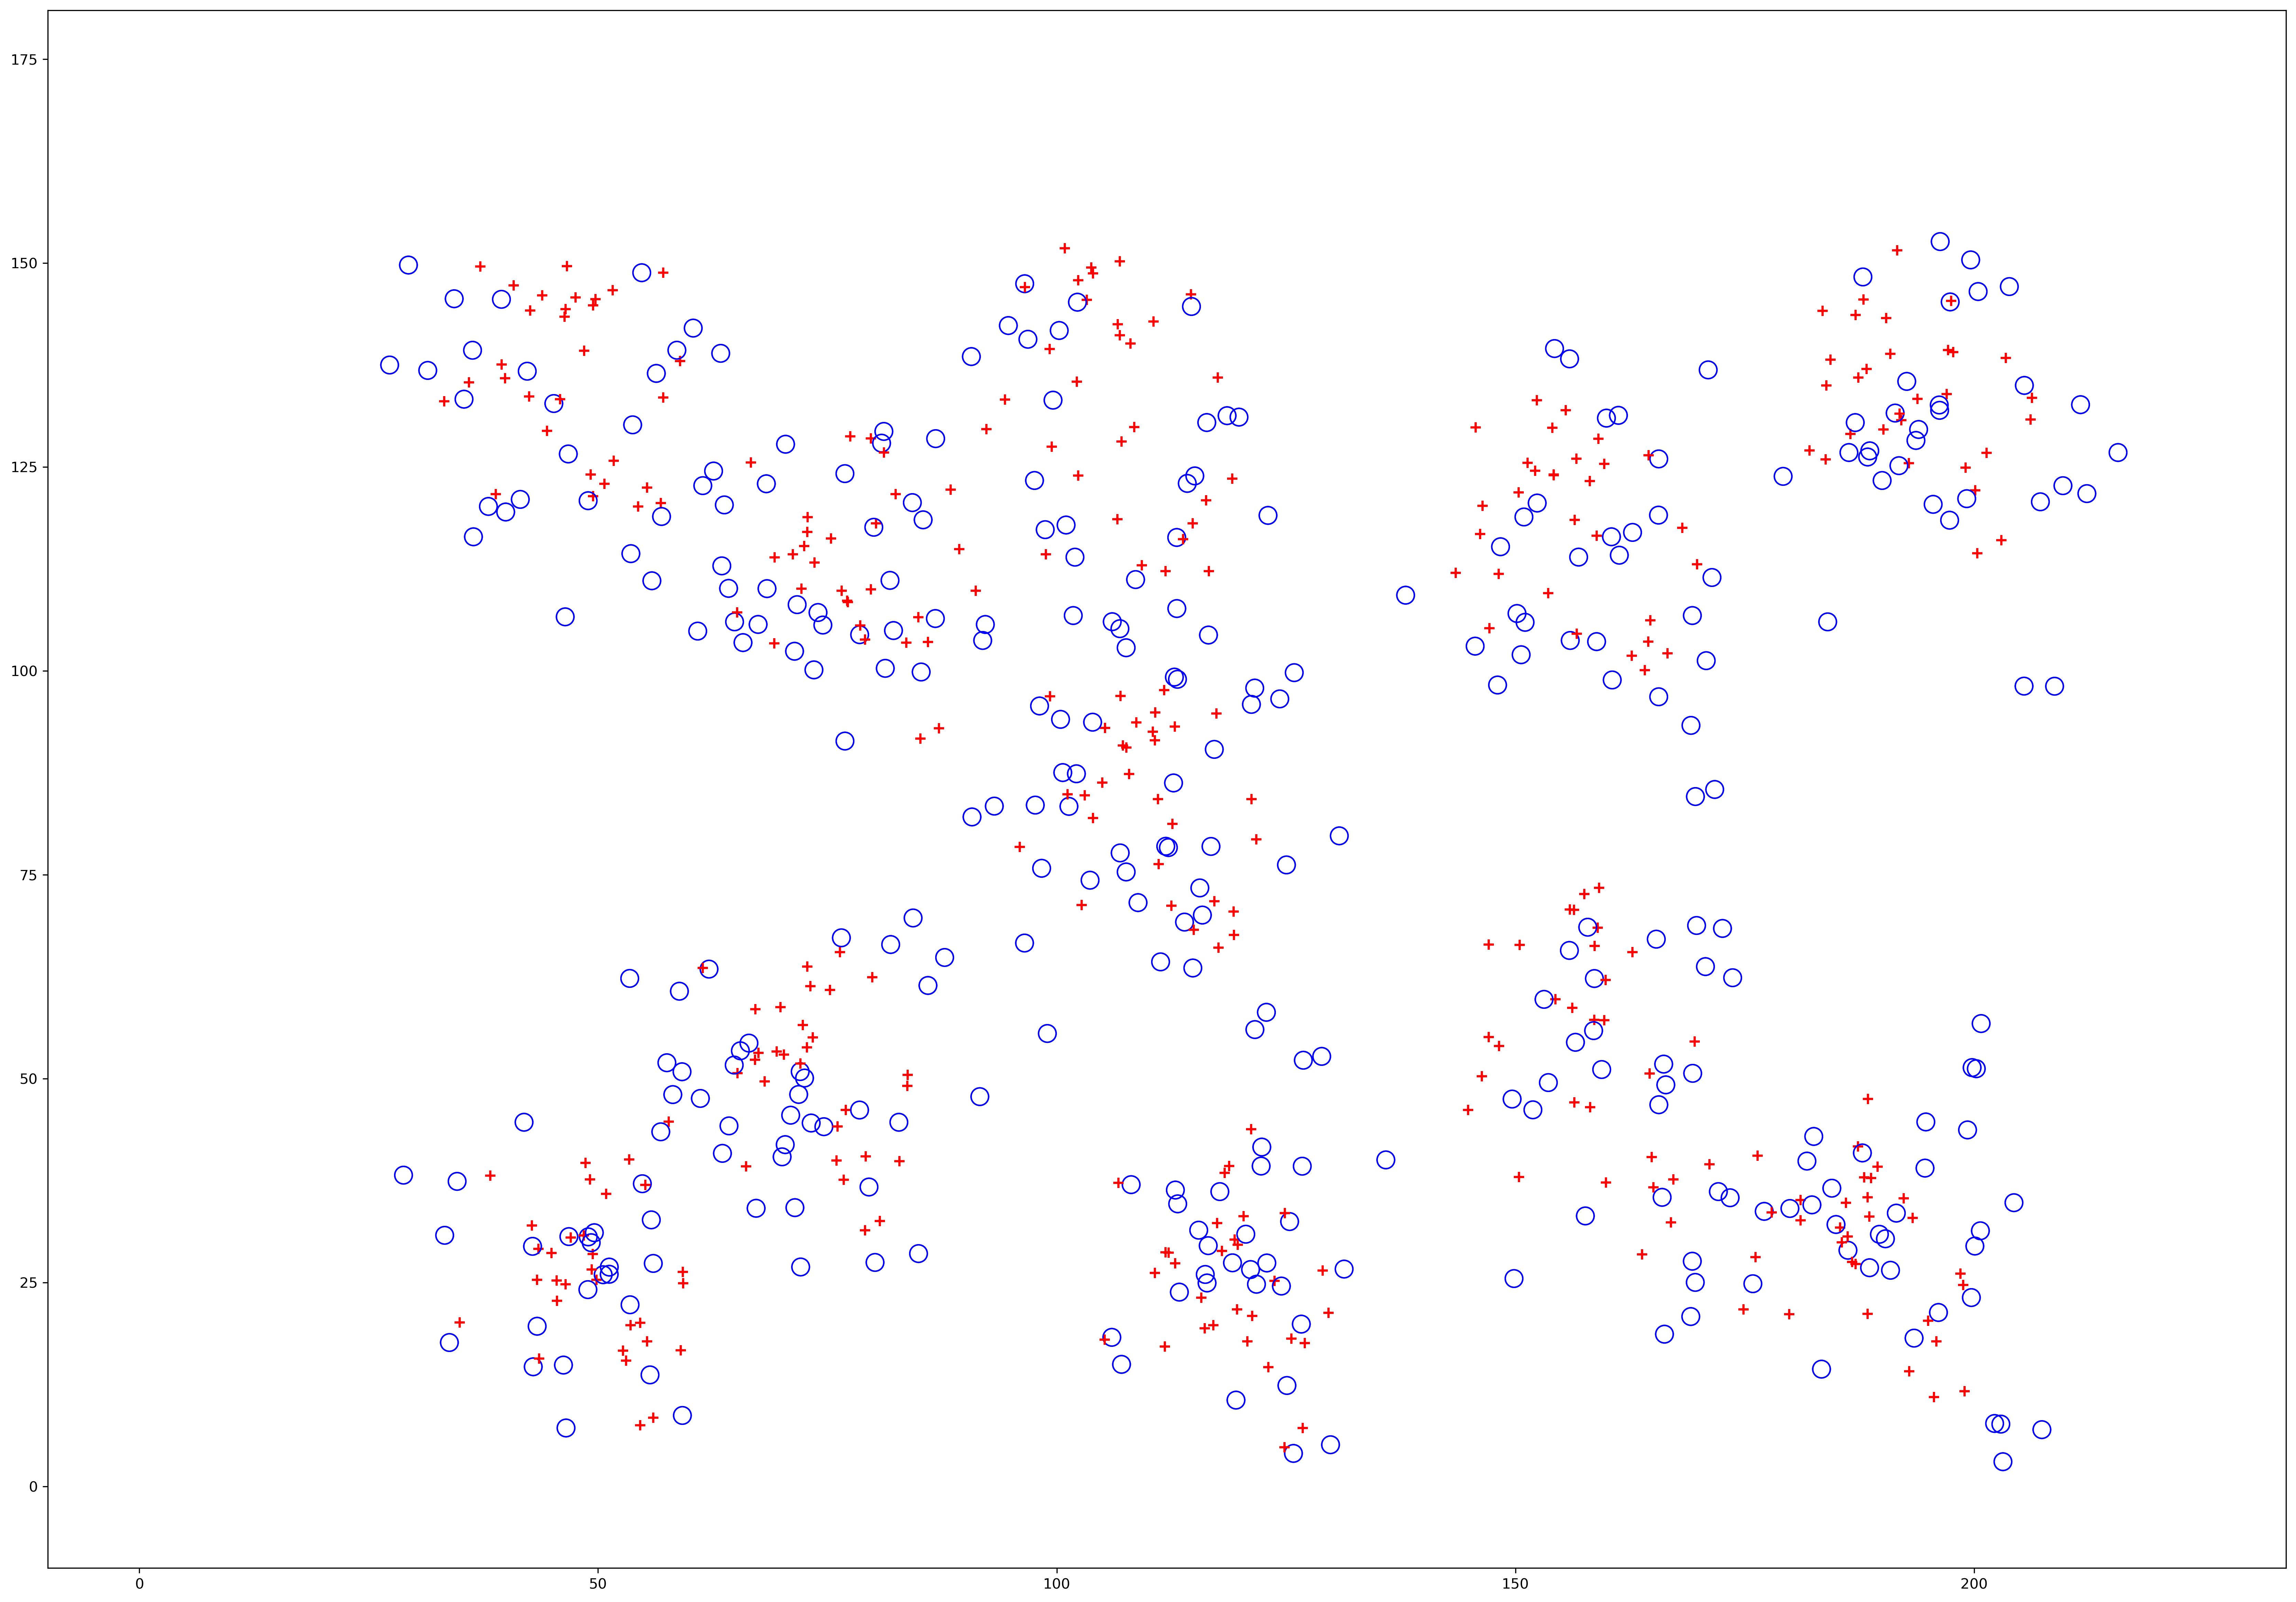

In [6]:
# load all meta.csv and display all x and y and all gaze_mean_cc_x/y 
fig = plt.figure(figsize=(28, 20), dpi=300, facecolor='w', edgecolor='k')
plt.xlim([-10, 234])
plt.ylim([-10, 181])
x_mean = 0
y_mean = 0


for participant_ID in participant_IDs:
    acc_rec_fps = GDDA.get_acc_rec_fps(participant_logbook, participant_ID, recordings_location, accs_rec_ids)
    acc_rec_fps_all = acc_rec_fps_all.append(acc_rec_fps, ignore_index=True)

for idx, recording_fp in enumerate(acc_rec_fps_all.loc[:, 'acc_rec_fp']):
    ttd_meta_data = pd.read_csv(os.path.join(recording_fp, 't_pos_gaze_coordinates_meta.csv'))
    plt.scatter(ttd_meta_data.loc[:, 'gaze_mean_cc_x'], ttd_meta_data.loc[:, 'gaze_mean_cc_y'], 
                    edgecolors='blue', marker='o', s=150, facecolors='none')
    plt.scatter(ttd_meta_data.loc[:, 'x'], ttd_meta_data.loc[:, 'y'], c='r', marker='+', s=50)
                                    
fig.show()

In [7]:
ttd_meta_data

,Unnamed: 0,r,x,y,nan_count,gaze_per_t_high_confi,gaze_mean_sc_x,gaze_mean_sc_y,gaze_mean_cc_x,gaze_mean_cc_y,delta_mean_cc_x,delta_mean_cc_y
0,1,8.996318,46.454122,24.793423,32,120.0,43.064377,29.450771,42.857475,29.432479,-3.596646,4.639056
1,2,9.534716,117.073882,19.748424,917,132.0,113.622600,24.287354,113.368792,23.814954,-3.705089,4.066530
2,3,9.341596,186.237102,30.655891,5,127.0,185.059657,31.834282,184.953604,32.108459,-1.283497,1.452569
3,4,9.517674,70.244517,52.933180,5,137.0,59.291603,50.863403,59.152502,50.838976,-11.092015,-2.094204
4,5,9.266040,156.397139,70.681553,712,130.0,152.754372,59.915267,153.124877,59.714660,-3.272261,-10.966893
5,6,9.146140,107.587370,90.573842,29,138.0,97.940818,83.493981,97.659766,83.535689,-9.927604,-7.038153
6,7,9.522531,77.246985,108.449040,917,130.0,67.803786,105.392147,67.447340,105.689097,-9.799645,-2.759943
7,8,9.379450,154.192617,124.075015,29,133.0,148.559662,115.066088,148.382684,115.217350,-5.809932,-8.857665
8,9,8.998573,46.348661,143.409298,29,135.0,31.722505,136.661831,31.433448,136.836040,-14.915212,-6.573258
9,10,9.269132,103.941567,148.720143,712,120.0,91.056169,138.515932,90.695100,138.536822,-13.246467,-10.183322


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


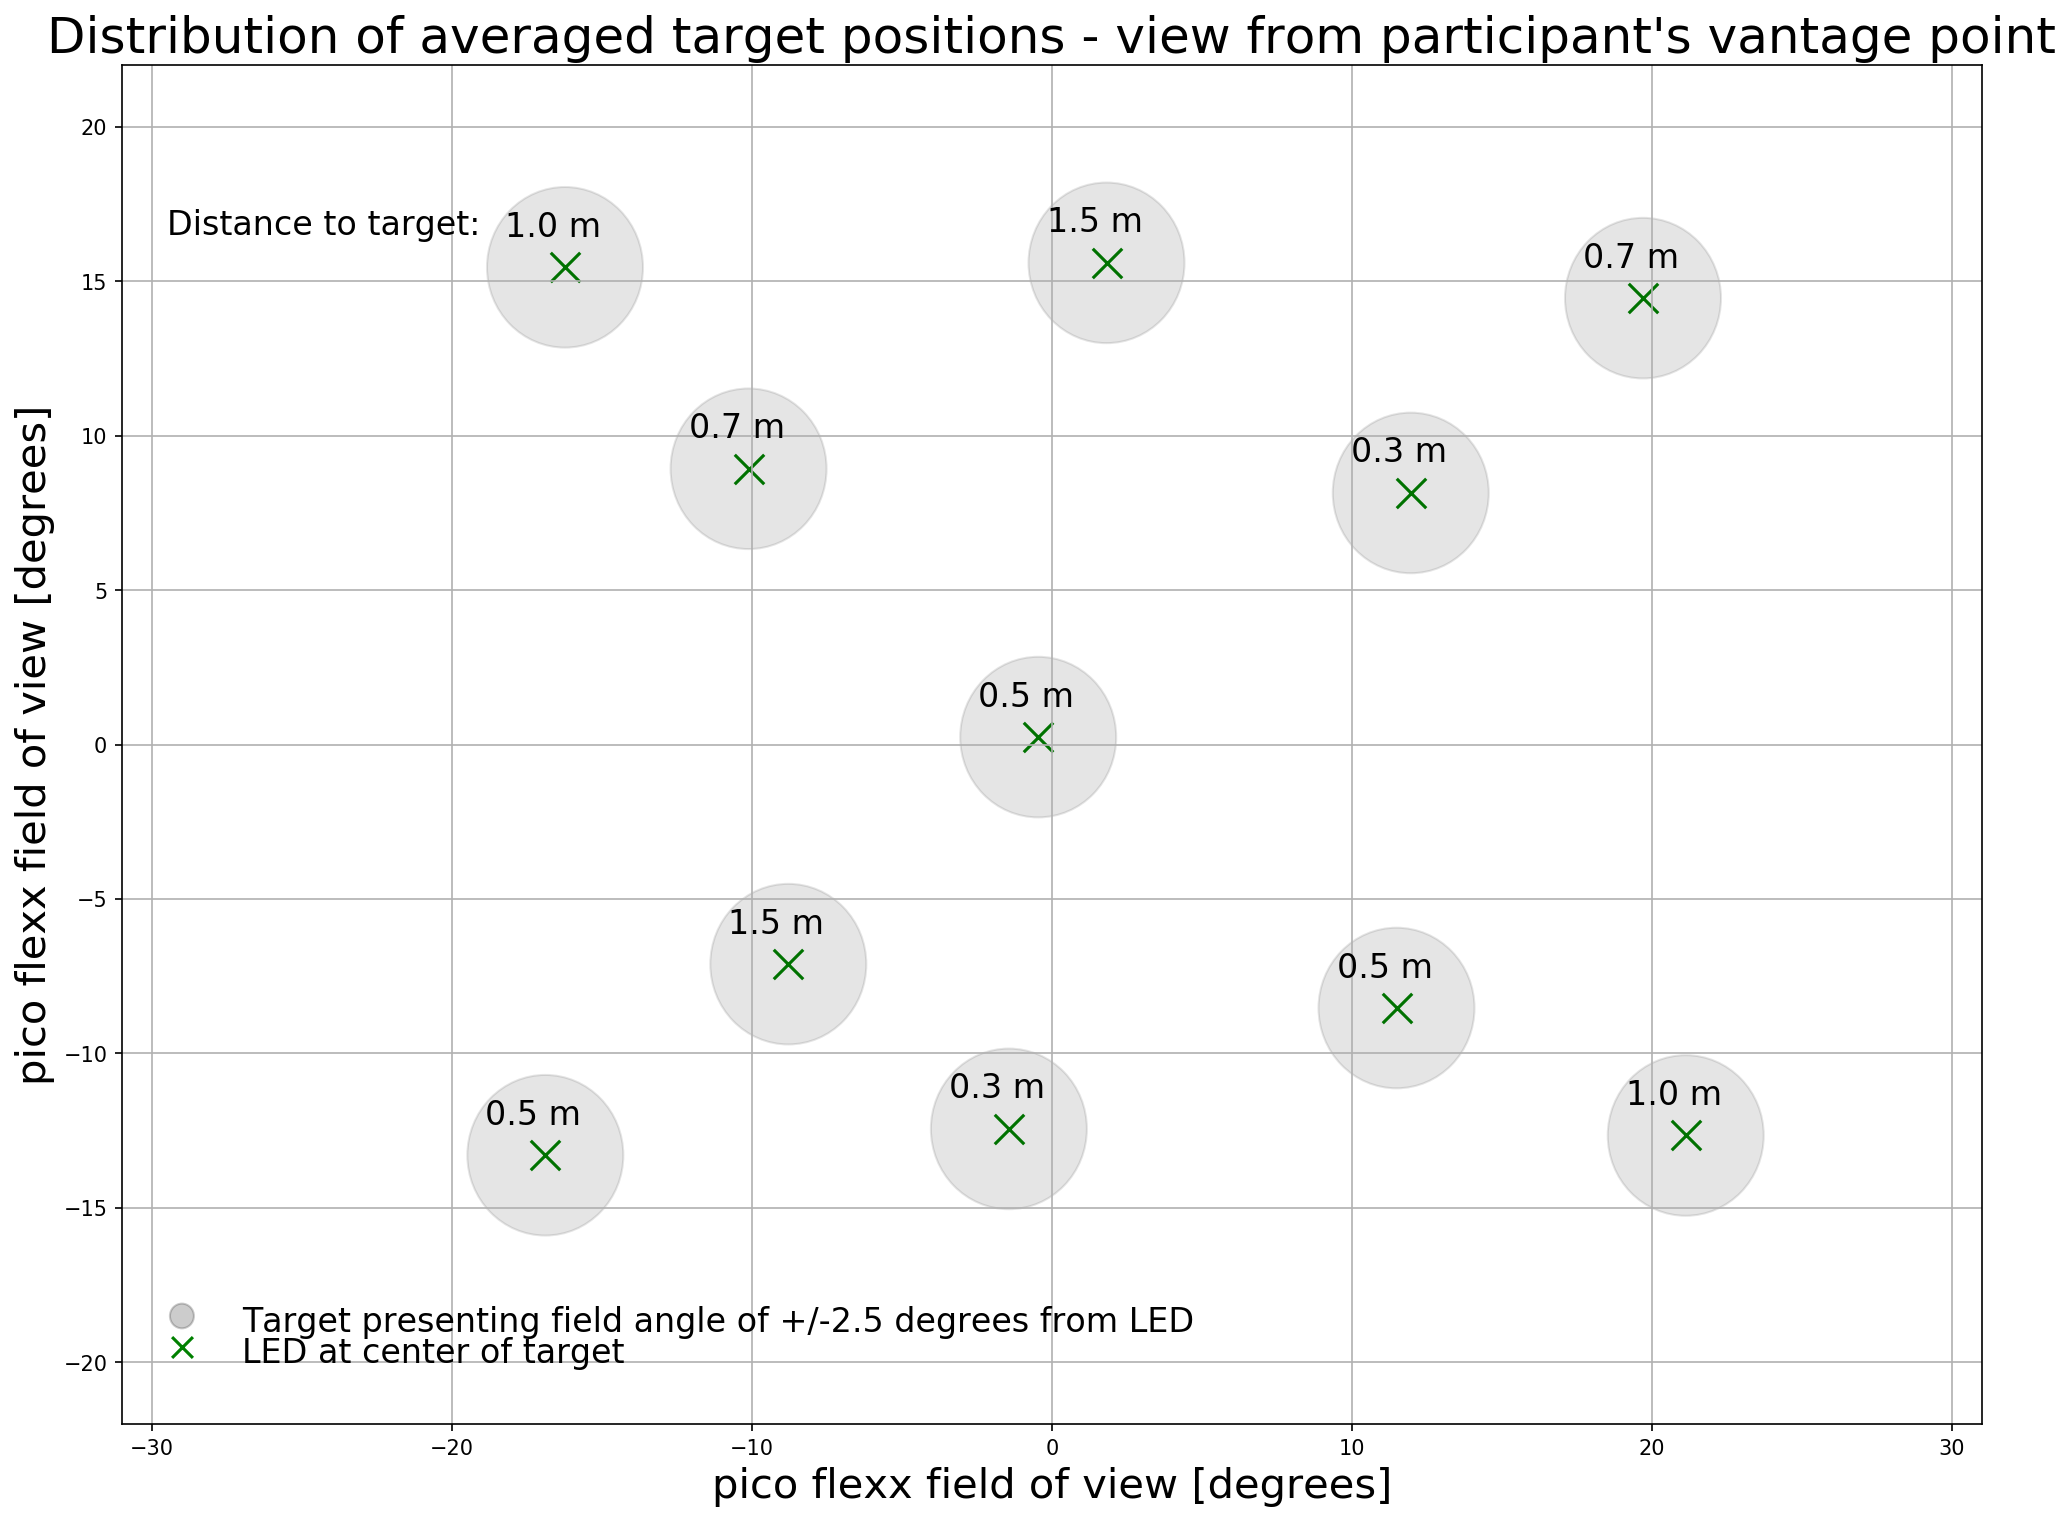

In [7]:
fig = plt.figure(figsize=(16, 12), dpi=150, facecolor='w', edgecolor='k')
plt.title("Distribution of averaged target positions - view from participant's vantage point" ,    fontsize=24)
plt.xlabel('pico flexx field of view [degrees]', fontsize=20)
plt.ylabel('pico flexx field of view [degrees]', fontsize=20)
plt.xlim([-31, 31])
plt.ylim([-22, 22])
plt.grid() 


plt.scatter((x_mean_all-112)*.26, (85+ -1*y_mean_all)*.26, c='g', marker='x', s=200)
    # # # detected targets and averaged area 
for c_idx in x_mean_all.index:
    circle=plt.Circle(((x_mean_all[c_idx]-112)*.26,
                      (-1 * y_mean_all[c_idx]+85)*.26),
                      10*.26,
                      fill=True, alpha=.1, color='black')
    plt.gcf().gca().add_artist(circle)

# plt.text(-30, 5.3, 'Legend:', fontsize=16)
circle=plt.Circle((-29,
                      -18.5),
                      .4,
                      fill=True, alpha=.2, color='black')
plt.gcf().gca().add_artist(circle)
plt.text(-27, -19, 'Target presenting field angle of +/-2.5 degrees from LED', fontsize=16) 

plt.scatter(-29, -19.5, c='g', marker='x', s=100)
plt.text(-27, -20, 'LED at center of target', fontsize=16)

plt.text(-29.5, 16.5, 'Distance to target:', fontsize=16)   
for t_aimed in range(0,11):
    plt.text((x_mean_all[t_aimed]-112)*.26-2,
             (-1*y_mean_all[t_aimed]+85)*.26+1,
             str(target_distances.distance[t_aimed+1])+ ' m', fontsize=16)
    

output_fn = os.path.join(r'C:\Users\p.wagner\Documents\phd\output', 
                         'distribution_all_targests_across_px_tests.jpeg')

plt.savefig(output_fn, orientation='landscape')

fig.show()